##  Frechet LeNet Distance (FLD) for Binary-MNIST


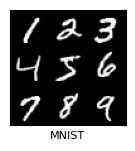

In [1]:
import torch
import numpy as np
from models import LeNet5
from utils import plot_combined_with_mnist_grid
from dataset import load_nist_data, get_test_samples
from fcd import fld_NIST

device = 'cuda:0'
lenet = LeNet5(num_classes=10)
lenet.load_state_dict(torch.load('models/LeNet5_MNIST.pth'))
lenet.eval()

#...Load MNIST reference dataset

digits = get_test_samples(name='MNIST',  plot=True)

## Frechet LeNet Distance (FLD) on bineraized MNIST

Below we compute the FLD metric for various image corruption levels of the binarized MNIST dataset.
For the classifier we used a pre-trained LeNet-5 architecture. Results below show that the FLD computed from 
features out of the last layer (third layer) has a better separation power accross all considered deformation. 

### 1. Gaussian noise

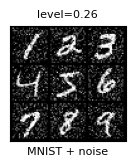

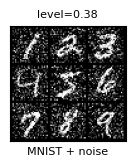

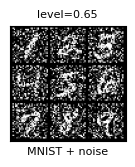

In [5]:
corruption = 'noise'

noise_level_1 = 0.26
digits_noise_1 = get_test_samples(name='MNIST', corruption=corruption, level=noise_level_1, plot=True)

noise_level_2 = 0.38
digits_noise_2 = get_test_samples(name='MNIST', corruption=corruption, level=noise_level_2, plot=True)

noise_level_3 = 0.65
digits_noise_3 = get_test_samples(name='MNIST', corruption=corruption, level=noise_level_3, plot=True)


In [3]:
fcd_1_noise = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0.0, 1, 0.05), activation_layer='fc1', device=device)
fcd_2_noise  = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0.0, 1, 0.05), activation_layer='fc2', device=device)
fcd_3_noise  = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0.0, 1, 0.05), activation_layer='fc3', device=device)

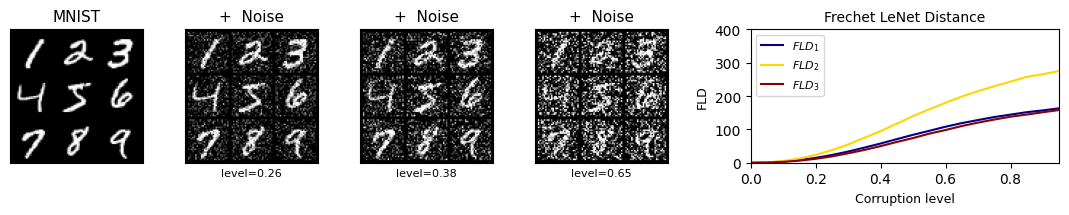

In [16]:
plot_combined_with_mnist_grid(samples=[digits, digits_noise_1, digits_noise_2, digits_noise_3], 
                              fcd=[fcd_1_noise, fcd_2_noise, fcd_3_noise], 
                              distortion='Noise', 
                              name='MNIST',
                              dist_levels=['', r'level={}'.format(noise_level_1), r'level={}'.format(noise_level_2), r'level={}'.format(noise_level_3)],
                              xlim=(0, 0.95),
                              ylim=(0, 400),
                              figsize=(11,2.25))

### 2. blackout

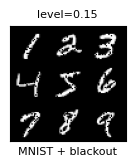

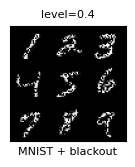

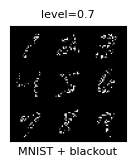

In [7]:
corruption = 'blackout'

black_level_1 = 0.15
black_level_2 = 0.4
black_level_3 = 0.7

digits_blackout_1 = get_test_samples(name='MNIST', corruption=corruption, level=black_level_1, plot=True)
digits_blackout_2 = get_test_samples(name='MNIST', corruption=corruption, level=black_level_2, plot=True)
digits_blackout_3 = get_test_samples(name='MNIST', corruption=corruption, level=black_level_3, plot=True)

In [8]:
fcd_1_black = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0.0, 1, 0.03), activation_layer='fc1', device=device)
fcd_2_black = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0.0, 1, 0.03), activation_layer='fc2', device=device)
fcd_3_black = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0.0, 1, 0.03), activation_layer='fc3', device=device)

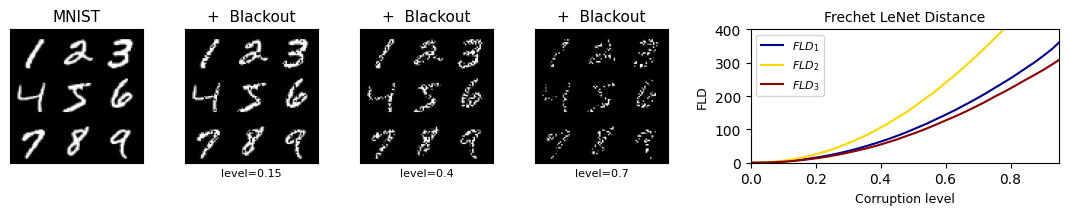

In [15]:
plot_combined_with_mnist_grid(samples=[digits, digits_blackout_1, digits_blackout_2, digits_blackout_3], 
                              fcd=[fcd_1_black, fcd_2_black, fcd_3_black], 
                              distortion='Blackout', 
                              name='MNIST',
                              dist_levels=['', r'level={}'.format(black_level_1), r'level={}'.format(black_level_2), r'level={}'.format(black_level_3)],
                              xlim=(0, 0.95),
                              ylim=(0, 400),
                              figsize=(11,2.25))

### 2. Gaussian blur

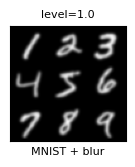

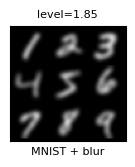

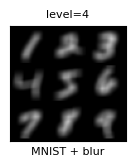

In [12]:
corruption = 'blur'

blur_level_1 = 1.0
blur_level_2 = 1.85
blur_level_3 = 4.0

digits_blur_1 = get_test_samples(name='MNIST', corruption=corruption, level=blur_level_1, plot=True)
digits_blur_2 = get_test_samples(name='MNIST', corruption=corruption, level=blur_level_2, plot=True)
digits_blur_3 = get_test_samples(name='MNIST', corruption=corruption, level=blur_level_3, plot=True)

In [14]:
fcd_1_blur = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0.01, 4, 0.25), activation_layer='fc1', device=device)
fcd_2_blur = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0.01, 4, 0.25), activation_layer='fc2', device=device)
fcd_3_blur = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0.01, 4, 0.25), activation_layer='fc3', device=device)

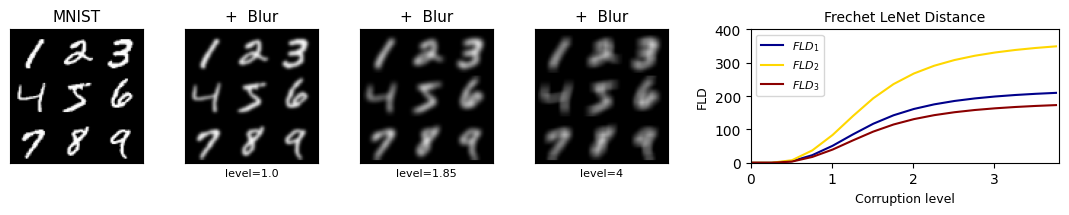

In [20]:
plot_combined_with_mnist_grid(samples=[digits, digits_blur_1, digits_blur_2, digits_blur_3], 
                              fcd=[fcd_1_blur, fcd_2_blur, fcd_3_blur], 
                              distortion='Blur', 
                              name='MNIST',
                              dist_levels=['', r'level={}'.format(blur_level_1), r'level={}'.format(blur_level_2), r'level={}'.format(blur_level_3)],
                              xlim=(0, 3.8),
                              ylim=(0, 400),
                              figsize=(11,2.25))

### 3. Swirl deformation

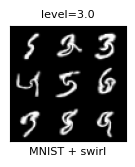

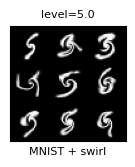

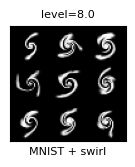

In [27]:
corruption = 'swirl'

swirl_level_1 = 3.0
swirl_level_2 = 5.0
swirl_level_3 = 8.0

digits_swirl_1 = get_test_samples(name='MNIST', corruption=corruption, level=swirl_level_1, plot=True)
digits_swirl_2 = get_test_samples(name='MNIST', corruption=corruption, level=swirl_level_2, plot=True)
digits_swirl_3 = get_test_samples(name='MNIST', corruption=corruption, level=swirl_level_3, plot=True)

In [28]:
fcd_1_swirl = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0, 9.0, 0.5), activation_layer='fc1', device=device)
fcd_2_swirl = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0, 9.0, 0.5), activation_layer='fc2', device=device)
fcd_3_swirl = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0, 9.0, 0.5), activation_layer='fc3', device=device)

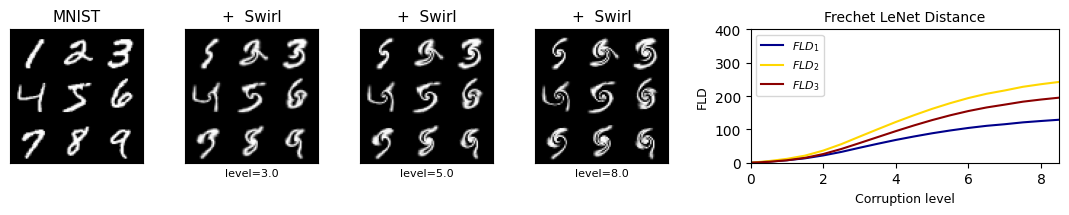

In [48]:
plot_combined_with_mnist_grid(samples=[digits, digits_swirl_1, digits_swirl_2, digits_swirl_3], 
                              fcd=[fcd_1_swirl, fcd_2_swirl, fcd_3_swirl], 
                              distortion='Swirl', 
                              name='MNIST',
                              dist_levels=['', r'level={}'.format(swirl_level_1), r'level={}'.format(swirl_level_2), r'level={}'.format(swirl_level_3)],
                              xlim=(0, 8.5),
                              ylim=(0, 400),
                              figsize=(11,2.25))

### 4. Pixelization

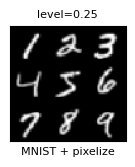

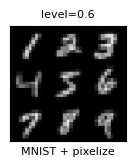

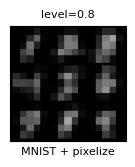

In [36]:
corruption = 'pixelize'

pix_level_1 = 0.25
pix_level_2 = 0.6
pix_level_3 = 0.8

digits_pix_1 = get_test_samples(name='MNIST', corruption=corruption, level=pix_level_1, plot=True)
digits_pix_2 = get_test_samples(name='MNIST', corruption=corruption, level=pix_level_2, plot=True)
digits_pix_3 = get_test_samples(name='MNIST', corruption=corruption, level=pix_level_3, plot=True)

In [37]:
fcd_1_pix = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0.0, 1, 0.03), activation_layer='fc1', device=device)
fcd_2_pix = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0.0, 1, 0.03), activation_layer='fc2', device=device)
fcd_3_pix = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0.0, 1, 0.03), activation_layer='fc3', device=device)

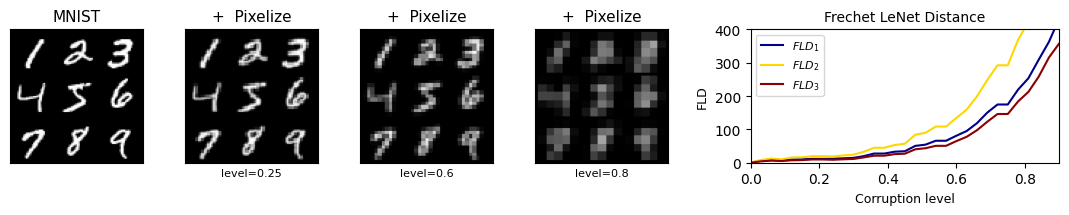

In [49]:
plot_combined_with_mnist_grid(samples=[digits, digits_pix_1, digits_pix_2, digits_pix_3], 
                              fcd=[fcd_1_pix, fcd_2_pix, fcd_3_pix], 
                              distortion='Pixelize', 
                              name='MNIST',
                              dist_levels=['', r'level={}'.format(pix_level_1), r'level={}'.format(pix_level_2), r'level={}'.format(pix_level_3)],
                              xlim=(0, 0.9),
                              ylim=(0, 400),
                              figsize=(11,2.25))

### 6. Crop image

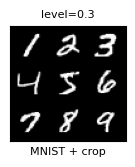

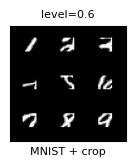

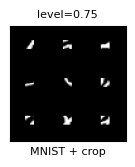

In [53]:
corruption = 'crop'

crop_level_1 = 0.3
crop_level_2 = 0.6
crop_level_3 = 0.75

digits_crop_1 = get_test_samples(name='MNIST', corruption=corruption, level=crop_level_1, plot=True)
digits_crop_2 = get_test_samples(name='MNIST', corruption=corruption, level=crop_level_2, plot=True)
digits_crop_3 = get_test_samples(name='MNIST', corruption=corruption, level=crop_level_3, plot=True)

In [54]:
fcd_1_crop = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0.0, 1, 0.03), activation_layer='fc1', device=device)
fcd_2_crop = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0.0, 1, 0.03), activation_layer='fc2', device=device)
fcd_3_crop = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0.0, 1, 0.03), activation_layer='fc3', device=device)

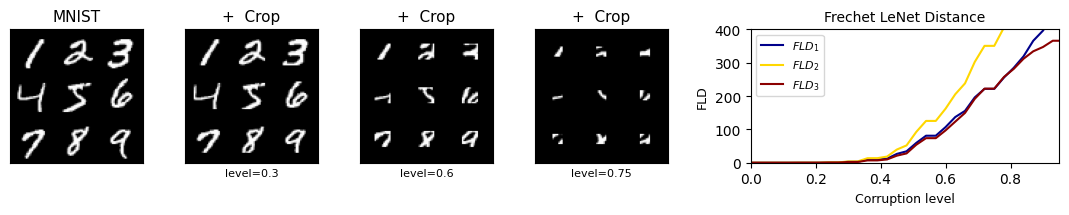

In [56]:
plot_combined_with_mnist_grid(samples=[digits, digits_crop_1, digits_crop_2, digits_crop_3], 
                              fcd=[fcd_1_crop, fcd_2_crop, fcd_3_crop], 
                              distortion='Crop', 
                              name='MNIST',
                              dist_levels=['', r'level={}'.format(crop_level_1), r'level={}'.format(crop_level_2), r'level={}'.format(crop_level_3)],
                              xlim=(0, 0.95),
                              ylim=(0, 400),
                              figsize=(11,2.25))

## Diversity and class-collapse

In [14]:
import numpy as np
from fid_metric import fid_distorted_NIST

fcd_1_div = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='undiversify', values=np.arange(0., 0.1, 0.001), activation_layer='fc1', device=device)
fcd_2_div = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='undiversify', values=np.arange(0., 0.1, 0.001), activation_layer='fc2', device=device)
fcd_3_div = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='undiversify', values=np.arange(0., 0.1, 0.001), activation_layer='fc3', device=device)

fcd_avg_div = {k: (fcd_1_div.get(k, 0) + fcd_2_div.get(k, 0) + fcd_3_div.get(k, 0) ) / 3.0 for k in fcd_1_div.keys()}


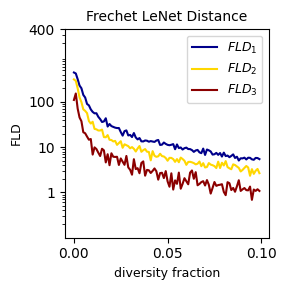

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
ax.plot(list(fcd_1_div.keys()), list(fcd_1_div.values()), color='darkblue', label=r'$FLD_1$')
ax.plot(list(fcd_2_div.keys()), list(fcd_2_div.values()), color='gold', label=r'$FLD_2$')
ax.plot(list(fcd_3_div.keys()), list(fcd_3_div.values()), color='darkred', label=r'$FLD_3$')
ax.set_title('Frechet LeNet Distance', fontsize=10)
ax.set_ylabel(r'FLD', fontsize=9)
ax.set_xlabel('diversity fraction', fontsize=9)

# if log:
ax.set_yscale('log')
ax.set_ylim(0.1, 500)
ax.set_yticks([1, 10, 100, 4000])
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())
ax.set_yticklabels(['1', '10', '100', '400'])
plt.legend(loc='upper right', fontsize=9)
plt.tight_layout()
plt.savefig('diversity_plot.png', bbox_inches='tight', dpi=500)
plt.show()

In [ ]:
import numpy as np
from fid_metric import fid_distorted_NIST

fcd_1_div = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='undiversify', values=np.arange(0., 0.1, 0.001), activation_layer='fc1', device=device)
fcd_2_div = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='undiversify', values=np.arange(0., 0.1, 0.001), activation_layer='fc2', device=device)
fcd_3_div = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='undiversify', values=np.arange(0., 0.1, 0.001), activation_layer='fc3', device=device)

fcd_avg_div = {k: (fcd_1_div.get(k, 0) + fcd_2_div.get(k, 0) + fcd_3_div.get(k, 0) ) / 3.0 for k in fcd_1_div.keys()}
